In [7]:
#Installing Gre for h2o purpose(h20 works on java!)
!apt-get install default-gre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package default-gre
openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


In [8]:
#Installing h2o for model selection
!pip install h2o

In [9]:
# Importing required libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
import h2o
from h2o.automl import H2OAutoML

In [10]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 min 16 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.4
H2O_cluster_version_age:,24 days
H2O_cluster_name:,H2O_from_python_unknownUser_9aoxvj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [11]:
# For sentence tokenizer purpose
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
#Extracting zip file
#Small Train Data
df = pd.read_csv('s_train.csv')
#data_raw = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
df.shape
df

,Unnamed: 0,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
0,0,"Pete The Cat Bedtime Blues Doll, 14.5 Inch","Pete the Cat is the coolest, most popular cat ...","[Pete the Cat Bedtime Blues plush doll,Based o...",MerryMakers,0
1,1,"The New Yorker NYHM014 Refrigerator Magnet, 2 ...",The New Yorker Handsome Cello Wrapped Hard Mag...,[Cat In A Tea Cup by New Yorker cover artist G...,The New Yorker,1
2,2,The Ultimate Self-Sufficiency Handbook: A Comp...,NaN,Skyhorse Publishing,imusti,2
3,3,Amway Nutrilite Kids Chewable Iron Tablets (100),NaN,"[Nutrilite Kids,Chewable Iron Tablets,Quantity...",Amway,3
4,4,Teacher Planner Company A4 6 Lesson Academic T...,NaN,NaN,NaN,4
...,...,...,...,...,...,...
995,995,Toteteca Shoulder Bag (Beige) (TT2486Beige),"This Shoulder Bag is formal, quilted and smart...","[Category : Fashion Accessories,Type : hand_me...",Toteteca,636
996,996,ADDA Men Big BOSS Black Silver Slippers UK-11,easy to wear,"[comfortable,washable,soft]",ADDA,810
997,997,"Etnies Women's Fader ls W's, Black Pink, 5.5 M US",Etnies Skate Shoes: FADER LS W'S Are The Perfe...,[Modern version of a long running fan favorite...,Etnies,997
998,998,"Zensual Kool Kajal, 2.5g",NaN,NaN,Zensual,998


In [13]:
#Total Titles
df['TITLE'].value_counts()

CLO01665 - Clorox Disinfecting Wipes Pack                                                 1
Dawn Pond Filter Wadding (POLYWOOL) Media 1m x 1m x 70mm                                  1
Yamaha 25HP 26HP 28HP 29HP 30HP 9 7/8 * 11-F 11'' Propeller Outboard Motor                1
SMK-Link Nano Dongle Bluetooth v4.0 LE EDR (VP6495)                                       1
Krishna Riding a Nari Kunjar - Watercolor on Patti - Artist: Rabi Behera                  1
                                                                                         ..
Kingston USB 2.0 microSD Flash Memory Card Reader FCR-MRB (Black)                         1
POSRUS Antiglare Touch Screen Protector for Wacom Cintiq 21UX DTZ-2100D 1st Generation    1
Amico Side Release Buckle Black Adjustable Nylon Luggage Strap                            1
Daler Rowney Simply Oil White Bristle Brush Zip Case (10 Pc) (The Art Of Giving)          1
RS ELECTRICALS Waterfall Style Bio-Filter RS-4000                               

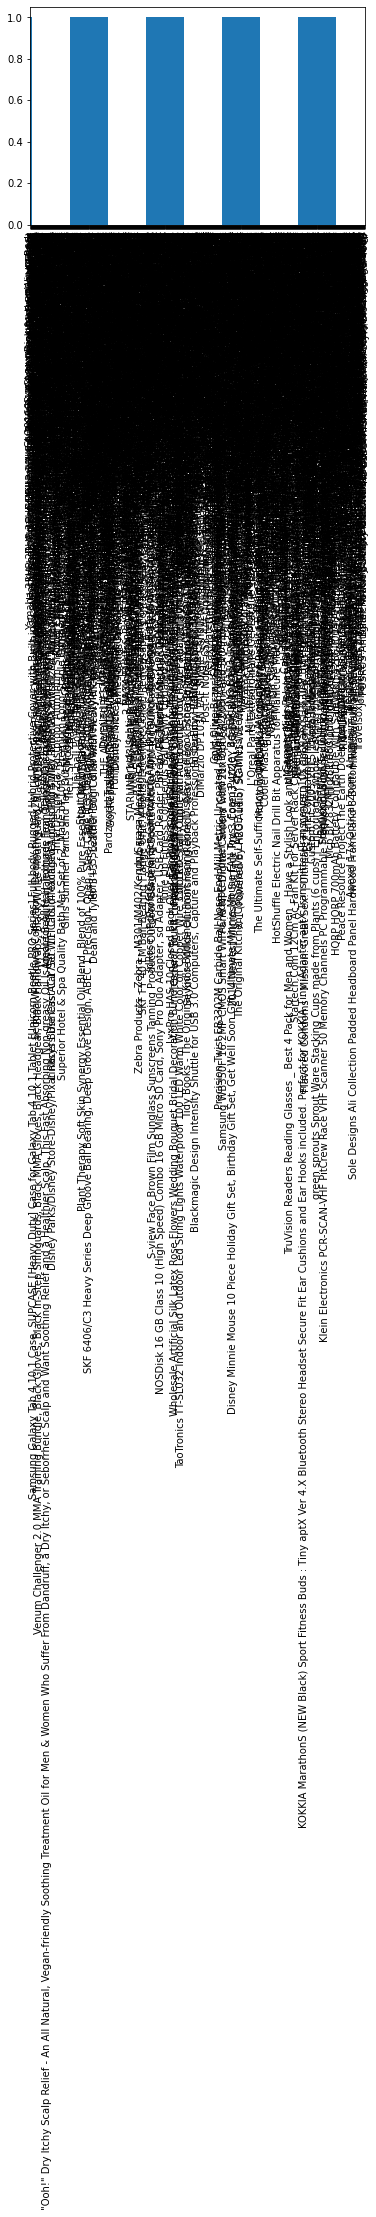

In [14]:
#plot
df['TITLE'].value_counts().plot(kind = 'bar') 


In [15]:
#Total DESCRIPTION
df['DESCRIPTION'].value_counts()

As per Image                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        2
###############################################################################################################################################################################################################################################################                                                   

In [16]:
##Total BRANDS
df['BRAND'].value_counts()

uxcell        5
Sony          5
Nike          4
Samsung       4
Adidas        4
             ..
DigitalUS     1
Algotherm     1
one on one    1
Vaseline      1
Realtree      1
Name: BRAND, Length: 756, dtype: int64

In [17]:
#Total BULLET_POINTS
df['BULLET_POINTS'].value_counts()

[The range includes 64 colors, including 7 dyna and 5 glazes, that come in standard packaging, 37ml, 80ml and 200ml as well as 5 colors in 650 ml jars; studio xl fine oil colors can be mixed together; the viscosity is constant from one color to another,Ideal for working with matter, xl oil dries to the touch in 3-6 days for an avarage application and allows for additional coats after 4 days; allow 6-9 months of drying before varnishing,Can be applied on canvas, cardboard and wood (suitable for most surfaces),To thin the colors, use essential oil of petroleum, oils or oil mediums depending on the deisred effect]    2
[Edemco force II cage pet dryer's two motors generate large volumes of warm air for faster drying and pet grooming,Blows the water from a dog's skin and coat and straighten hair without the use of a slicker brush,Includes two 6-feet hoses, nozzles, and cage attachments and an 8-feet long cord,Measures 18-1/2-inch length by 18-1/3-inch width by 18-1/3-inch height]           

In [18]:
#Total BROWSE_NODE_ID
df['BROWSE_NODE_ID'].value_counts()

4      56
55     32
69     15
209     8
362     8
       ..
612     1
611     1
610     1
607     1
459     1
Name: BROWSE_NODE_ID, Length: 653, dtype: int64

In [19]:
#Check for missing values
missing_values_check = df.isnull().sum()
print("Small Train Data Missing Values\n")
print(missing_values_check)

Small Train Data Missing Values

Unnamed: 0          0
TITLE               0
DESCRIPTION       401
BULLET_POINTS     250
BRAND             127
BROWSE_NODE_ID      0
dtype: int64


In [20]:
#Unique Browse Nodes
print("Train Browse nodes: " , len(df['BROWSE_NODE_ID'].unique()))

Train Browse nodes:  653


In [21]:
required_df = df[['TITLE','DESCRIPTION','BULLET_POINTS','BRAND','BROWSE_NODE_ID']]

In [22]:
pd.set_option('display.max_colwidth',-1)
required_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
0,"Pete The Cat Bedtime Blues Doll, 14.5 Inch","Pete the Cat is the coolest, most popular cat in town. The new Pete the Cat Bedtime Blues Doll from MerryMakers rocks his striped pj's and red slippers. He is one sleepy cat and is ready to cuddle. Measures 14.5 inches tall. Safe for all ages. Removable clothing. Surface wash only. New 2015","[Pete the Cat Bedtime Blues plush doll,Based on the popular Pete the Cat books by James Dean,Super cuddly and ready for naptime and bedtime,Safe for all ages, perfect for ages 2 and up,Measures 14. 5 inches]",MerryMakers,0
1,"The New Yorker NYHM014 Refrigerator Magnet, 2 x 3.5",The New Yorker Handsome Cello Wrapped Hard Magnet measures 2.5-Inch width by 3.5-Inch height and highlight one of the many beautiful New Yorker covers in full color. Cat In A Tea Cup by New Yorker cover artist Gurbuz Dogan Eksioglu,"[Cat In A Tea Cup by New Yorker cover artist Gurbuz Dogan Eksioglu,Handsome cello wrapped hard magnet,Ideal for home or office, or for a gift and for any New Yorker magazine lover,It highlight one of the many beautiful New Yorker covers in full color,Rigid magnet measures 2. 5-Inch width by 3. 5-Inch height]",The New Yorker,1
2,"The Ultimate Self-Sufficiency Handbook: A Complete Guide to Baking, Crafts, Gardening, Preserving Your Harvest, Raising Animals and More",NaN,Skyhorse Publishing,imusti,2
3,Amway Nutrilite Kids Chewable Iron Tablets (100),NaN,"[Nutrilite Kids,Chewable Iron Tablets,Quantity 100 tablets]",Amway,3
4,Teacher Planner Company A4 6 Lesson Academic Teacher Planner - Leatherette Pink,NaN,NaN,NaN,4
...,...,...,...,...,...
995,Toteteca Shoulder Bag (Beige) (TT2486Beige),"This Shoulder Bag is formal, quilted and smart. Beautiful single color bag with secure top zipper. Back Zipper and inside compartments. Powered by 99yrs For any quires mail us :support@99yrs.com","[Category : Fashion Accessories,Type : hand_messenger_bag,Model Name : Quilted Shoulder Bag,Material : Faux Leather,Bag Size : Medium]",Toteteca,636
996,ADDA Men Big BOSS Black Silver Slippers UK-11,easy to wear,"[comfortable,washable,soft]",ADDA,810
997,"Etnies Women's Fader ls W's, Black Pink, 5.5 M US","Etnies Skate Shoes: FADER LS W'S Are The Perfect Skate Shoes For Men, Women, And Kids This Skate Shoe Comes In Various Sizes And Its Not Just For Skateboarding; Etnies Brings The Skater Style To You","[Modern version of a long running fan favorite,Deconstructed, redesigned, and the reassembled into the ago of slimmer footwear]",Etnies,997
998,"Zensual Kool Kajal, 2.5g",NaN,NaN,Zensual,998


In [23]:
#Splitting Train and Test Data
X_train, X_test = train_test_split(required_df,test_size = 0.2,random_state = 111)
print(X_train.shape)
print(X_test.shape)

(800, 5)
(200, 5)


In [24]:
#Preprocessing
import pandas as pd
import csv
import nltk
!pip install num2words

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from num2words import num2words

import nltk
import os
import numpy as np
import math
import json

     |████████████████████████████████| 101 kB 4.7 MB/s 


In [25]:
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))

#Stemming
stemmer = nltk.stem.SnowballStemmer('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
vectorizer_tf = TfidfVectorizer(stop_words = None,lowercase = False, strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
train_vectors = vectorizer_tf.fit_transform(X_train[['BRAND', 'BULLET_POINTS', 'DESCRIPTION', 'TITLE']])

In [27]:
train_vectors.A

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [28]:
vectorizer_tf.get_feature_names()

['BRAND', 'BULLET_POINTS', 'DESCRIPTION', 'TITLE']

In [29]:
test_vectors = vectorizer_tf.transform(X_test[['BRAND', 'BULLET_POINTS', 'DESCRIPTION', 'TITLE']])

In [30]:
X_train.shape

(800, 5)

In [31]:
train_df = pd.DataFrame(train_vectors.toarray(),columns = vectorizer_tf.get_feature_names())
train_df = pd.concat([train_df,X_train['BROWSE_NODE_ID']],axis = 1)
train_df

,BRAND,BULLET_POINTS,DESCRIPTION,TITLE,BROWSE_NODE_ID
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,NaN
2,0.0,0.0,1.0,0.0,2.0
3,0.0,0.0,0.0,1.0,3.0
4,NaN,NaN,NaN,NaN,4.0
...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,994.0
996,NaN,NaN,NaN,NaN,810.0
997,NaN,NaN,NaN,NaN,997.0
998,NaN,NaN,NaN,NaN,998.0


In [32]:
test_df = pd.DataFrame(test_vectors.toarray(),columns = vectorizer_tf.get_feature_names())
test_df = pd.concat([test_df,X_test['BROWSE_NODE_ID']],axis = 1)
test_df

,BRAND,BULLET_POINTS,DESCRIPTION,TITLE,BROWSE_NODE_ID
0,1.0,0.0,0.0,0.0,NaN
1,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,NaN
3,0.0,0.0,0.0,1.0,NaN
5,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...
982,NaN,NaN,NaN,NaN,982.0
983,NaN,NaN,NaN,NaN,983.0
987,NaN,NaN,NaN,NaN,362.0
992,NaN,NaN,NaN,NaN,636.0


In [33]:
h2o_train_df = h2o.H2OFrame(train_df)
h2o_test_df = h2o.H2OFrame(test_df)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [34]:
h2o_train_df.types

{'BRAND': 'enum',
 'BROWSE_NODE_ID': 'int',
 'BULLET_POINTS': 'enum',
 'DESCRIPTION': 'enum',
 'TITLE': 'enum'}

In [35]:
#BROWSE NODE ID is output okkkk so it must be of type 'enum'
h2o_train_df['BROWSE_NODE_ID'] = h2o_train_df['BROWSE_NODE_ID'].asfactor()
h2o_test_df['BROWSE_NODE_ID'] = h2o_test_df['BROWSE_NODE_ID'].asfactor()

In [36]:
h2o_train_df.types
#h2o_test_df.types

{'BRAND': 'enum',
 'BROWSE_NODE_ID': 'enum',
 'BULLET_POINTS': 'enum',
 'DESCRIPTION': 'enum',
 'TITLE': 'enum'}

In [37]:
aml = H2OAutoML(max_models=10,seed=10,exclude_algos=["StackedEnsemble"],verbosity="info",nfolds=0,balance_classes=False,max_after_balance_size = 0.3)

In [38]:
x = vectorizer_tf.get_feature_names()
print(x)
y = 'BROWSE_NODE_ID'
print(y)

['BRAND', 'BULLET_POINTS', 'DESCRIPTION', 'TITLE']
BROWSE_NODE_ID


In [39]:
aml.train(x=x,y=y,training_frame=h2o_train_df,validation_frame=h2o_test_df)

AutoML progress: |
14:06:31.369: Project: AutoML_20210802_140631362
14:06:31.377: Cross-validation disabled by user: no fold column nor nfolds > 1.
14:06:31.380: Setting stopping tolerance adaptively based on the training frame: 0.03533326266687867
14:06:31.381: Build control seed: 10
14:06:31.381: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
14:06:31.427: training frame: Frame key: automl_training_py_1_sid_a7d8    cols: 5    rows: 721  chunks: 1    size: 46220  checksum: 22710418600506
14:06:31.429: validation frame: Frame key: py_2_sid_a7d8    cols: 5    rows: 203  chunks: 1    size: 15965  checksum: 2334102577612
14:06:31.442: leaderboard frame: Frame key: automl_leaderboard_py_1_sid_a7d8    cols: 5    rows: 80  chunks: 1    size: 42102  checksum: 14084511397424
14:06:31.442: blending frame: NULL
14:06:31.442: response column: BROWSE_NODE_ID
14:06:31.442: fold 

In [40]:
aml.leaderboard

model_id,mean_per_class_error,logloss,rmse,mse,auc,aucpr
DeepLearning_1_AutoML_20210802_140631,0.126354,7.63608,0.996658,0.993327,nan,nan
XRT_1_AutoML_20210802_140631,0.126354,23.0664,0.997861,0.995727,nan,nan
DRF_1_AutoML_20210802_140631,0.126354,22.9948,0.996567,0.993145,nan,nan
DeepLearning_grid__1_AutoML_20210802_140631_model_1,0.126354,8.10402,0.997156,0.994321,nan,nan
GBM_1_AutoML_20210802_140631,0.126354,6.2142,0.996336,0.992685,nan,nan
GBM_2_AutoML_20210802_140631,0.128159,6.31716,0.998195,0.996393,nan,nan
GBM_5_AutoML_20210802_140631,0.128159,6.31716,0.998195,0.996393,nan,nan
GBM_grid__1_AutoML_20210802_140631_model_1,0.128159,6.31716,0.998195,0.996393,nan,nan
GBM_3_AutoML_20210802_140631,0.128159,6.31716,0.998195,0.996393,nan,nan
GBM_4_AutoML_20210802_140631,0.128159,6.31716,0.998195,0.996393,nan,nan


In [45]:
pred = aml.leader.predict(h2o_test_df)
print(pred)
#print(pred['predict'])


deeplearning prediction progress: |███████████████████████████████████████| 100%


predict p0 p2 p3 p4 p5 p6 p7 p9 p10 p11 p14 p15 p16 p17 p20 p21 p22 p23 p24 p25 p26 p27 p28 p30 p31 p32 p33 p35 p36 p37 p38 p39 p40 p42 p43 p44 p45 p46 p54 p55 p57 p58 p60 p61 p62 p63 p64 p65 p66 p68 p69 p70 p72 p74 p75 p76 p77 p78 p79 p81 p82 p83 p84 p85 p86 p88 p89 p90 p91 p92 p95 p96 p97 p98 p99 p102 p103 p105 p106 p107 p108 p109 p110 p112 p113 p114 p115 p116 p117 p118 p120 p124 p125 p127 p129 p130 p131 p132 p133 p134 p135 p136 p137 p138 p139 p143 p145 p147 p148 p149 p150 p151 p152 p153 p154 p155 p160 p165 p179 p180 p181 p186 p187 p188 p189 p190 p191 p192 p193 p194 p195 p196 p197 p199 p200 p201 p202 p204 p205 p206 p207 p208 p209 p210 p211 p214 p215 p216 p217 p218 p219 p220 p221 p222 p223 p224 p225 p226 p229 p230 p231 p232 p234 p235 p237 p238 p239 p241 p242 p243 p244 p245 p247 p248 p249 p251 p252 p254 p255 p256 p258 p259 p261 p264 p265 p266 p267 p268 p269 p270 p272 p275 p276 p277 p278 p279 p280 p282 p283 p285 p287 p289 p290 p291 p293 p296 p300 p301 p302 p304 p306 p307 p311 p312 p313 p315 p316 p317 p319 p322 p324 p329 p330 p333 p334 p340 p341 p343 p347 p348 p349 p350 p357 p358 p359 p360 p362 p363 p365 p368 p369 p372 p374 p375 p377 p379 p381 p382 p383 p389 p390 p391 p392 p393 p394 p395 p396 p397 p398 p405 p406 p407 p408 p409 p411 p413 p417 p422 p423 p425 p426 p427 p430 p434 p435 p437 p438 p440 p442 p447 p448 p449 p450 p451 p452 p453 p454 p455 p457 p458 p459 p466 p467 p468 p469 p471 p473 p474 p477 p480 p481 p485 p486 p488 p489 p490 p495 p498 p499 p503 p505 p507 p508 p509 p510 p511 p513 p514 p515 p517 p519 p520 p521 p525 p526 p529 p530 p531 p532 p534 p535 p536 p537 p538 p541 p543 p545 p546 p548 p551 p552 p553 p554 p555 p557 p558 p560 p562 p563 p564 p565 p567 p568 p569 p570 p571 p572 p573 p578 p579 p580 p588 p589 p590 p591 p593 p594 p595 p596 p598 p601 p602 p605 p607 p610 p611 p614 p615 p618 p619 p620 p621 p622 p625 p629 p631 p637 p646 p648 p651 p653 p658 p659 p660 p663 p665 p667 p670 p675 p676 p677 p681 p684 p686 p689 p691 p692 p694 p696 p698 p699 p708 p709 p710 p711 p713 p714 p715 p720 p721 p723 p726 p727 p732 p733 p735 p738 p739 p742 p744 p745 p746 p747 p748 p750 p752 p753 p754 p755 p757 p758 p759 p761 p762 p763 p766 p768 p773 p777 p780 p781 p782 p784 p785 p787 p788 p789 p794 p798 p800 p801 p803 p804 p805 p808 p810 p816 p818 p819 p821 p824 p827 p828 p830 p832 p834 p836 p839 p840 p842 p846 p849 p850 p851 p852 p855 p856 p858 p862 p863 p864 p868 p869 p871 p872 p876 p877 p878 p880 p881 p886 p887 p890 p892 p896 p899 p903 p905 p906 p908 p911 p912 p916 p918 p919 p923 p925 p926 p928 p929 p935 p939 p940 p944 p951 p953 p954 p956 p958 p959 p960 p961 p962 p963 p964 p965 p969 p971 p972 p973 p976 p977 p978 p980 p981 p984 p985 p988 p989 p990 p993 p994 p997 p998 
 
 
 4 0.00334479 0.00127227 0.000979756 0.0767001 0.00505375 0.000473789 0.00106463 0.00157814 7.38176e-05 0.00400979 0.00120934 0.00131449 0.00220675 0.00104814 0.00106395 0.00132982 0.00288917 0.0031754 0.000188035 0.00196513 0.00124282 0.00245411 0.00121131 0.000991535 0.00138984 0.00177209 0.000904945 0.0056661 0.000768466 0.00188056 0.0102272 0.000872473 0.00187488 0.00101674 0.00172692 0.00126271 0.000998673 0.000920265 0.00166414 0.0369427 0.00143366 0.0020998 0.00117005 0.00161796 0.00133299 0.00121664 0.000890368 0.00137432 0.00198606 0.000172081 0.0139638 0.00142875 0.00101355 0.000867201 0.00486656 0.00264898 0.000140532 0.00189951 0.00165032 0.00205312 0.00575364 0.00227785 0.00277219 0.00248709 0.000816131 0.00142369 0.0112296 0.00205686 0.00645526 0.00293501 0.000117414 0.000131449 0.00169814 0.00642484 0.00133048 0.00118065 0.00406328 0.00244934 0.00105526 0.00100548 0.00156333 0.00220618 0.0028322 0.00513547 0.000118745 0.00130935 0.00647299 0.00248265 0.000106964 0.00547582 0.00186726 0.00132969 0.000893822 0.00261027 0.00139173 0.000903521 0.0019145 0.00307953 0.00658065 0.00175827 0.0019368 0.00108518 0.00072259 0.000905919 0.000136378 0.0035617 0.000700991 0.000839559 0.000999382 0.00144703 0.00118761 0.00130441 0.00404693 0.00235621 0.00181582 0.00221172 0.00059

In [42]:
aml.leader.model_performance(h2o_test_df)


ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.9884091568124324
RMSE: 0.9941876869145143
LogLoss: 20.391386241562792
Mean Per-Class Error: 0.2557427258805513
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,2,3,4,5,6,7,9,10,11,14,15,16,17,20,21,22,23,24,25,26,27,28,30,31,32,33,35,36,37,38,39,40,42,43,44,45,46,54,55,...,701,702,705,716,730,737,751,764,770,771,775,778,796,797,811,812,826,829,837,841,847,866,873,875,883,891,900,914,917,922,924,946,966,968,970,979,982,983,Error,Rate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0 / 0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0 / 0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1 / 1
3,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 14
4,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2 / 2
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0 / 0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0 / 0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0 / 0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0 / 0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1 / 1



See the whole table with table.as_data_frame()

Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.070
1,2,0.070
2,3,0.100
3,4,0.120
4,5,0.120
5,6,0.125
6,7,0.130
7,8,0.130
8,9,0.130
9,10,0.130


In [43]:
res = pred['predict']

In [44]:
res.set_name(col = 0,name = 'BROWSE_NODE_ID')
h2o.export_file(res,path = "\output.csv")

Export File progress: |███████████████████████████████████████████████████| 100%
